This EDA is on Predicting Housing Market Trends: A Data-Driven Approach to Price Forecasting.
Housing and rental prices have always been subject to the whims of the market, fluctuating over time, rising, and falling based on supply and demand. Many companies have spent untold dollars monitoring and logging this data to give researchers and comment people the ability to view the current market within the context of data spanning decades to establish trends and compare results.

Mainly focused on House Value trends across USA over different counties. Make sure do House Prices are getting impacted by Percapita income.

The data used in this analysis is sourced from the Zillow website. We have subset all the data for a span from 2019 to 2024 i.e., last five years to maintain the relativity of the data to the current time. The data sets can be downloaded or viewed at: https://www.zillow.com/research/data/

Used Zillow Home Value Index (ZHVI) at ZipCode Level and Sumamrise for County Level.
FIPS Data for Latitude and Longitude for each of counties at USA.
Percapita Income for each of Counties in USA from Bureau of Economic Analysis Data.

In [1]:
import re
import sys
import warnings
import pandas as pd
from pandasql import sqldf
# Ignore all warnings
warnings.filterwarnings("ignore")
import os
import pyodbc
import pandas as pd
import pandera as pa
import csv
#from bs4 import BeautifulSoup
#from pandera import DataFrameSchema,Column, Check, Index, MultiIndex
#import sqlalchemy;
from os import environ;
pd.set_option('display.max_columns', None)
dirpath=r"C:\Users\req92163\OneDrive - Mutual of Omaha\DSCI8950"
zhvi_filename = 'Zipcode_zhvi_sfcondo_tier.csv'
zhvi_filepath = os.path.join(dirpath, zhvi_filename)
zhvi_condo_df = pd.read_csv(zhvi_filepath, header=None)  # Read without headers
zhvi_condo_df.columns = zhvi_condo_df.iloc[0]  # Set first row as column names
zhvi_condo_df = zhvi_condo_df[1:].reset_index(drop=True)  # Remove first row from data
cfips_filename = 'cfips_location.csv'
cfips_filepath = os.path.join(dirpath,cfips_filename)
cfips_df = pd.read_csv(cfips_filepath,header=0)
percapita_filename = "Percapita_Income.csv"
percapita_filepath = os.path.join(dirpath, percapita_filename)
percapita_unpivot_df = pd.read_csv(percapita_filepath,header=0)


Identify the Columns of Zillow Home Value Index . Print the first 2 records and Columns 

In [2]:
zhvi_condo_df = zhvi_condo_df[(zhvi_condo_df['StateName'] != 'HI') & (zhvi_condo_df['StateName'] != 'AK')]
print(zhvi_condo_df.columns)
zhvi_condo_df.head(2)


Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '01/31/2000',
       ...
       '03/31/2024', '04/30/2024', '05/31/2024', '06/30/2024', '07/31/2024',
       '08/31/2024', '09/30/2024', '10/31/2024', '11/30/2024', '12/31/2024'],
      dtype='object', name=0, length=309)


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,01/31/2000,02/29/2000,03/31/2000,04/30/2000,05/31/2000,06/30/2000,07/31/2000,08/31/2000,09/30/2000,10/31/2000,11/30/2000,12/31/2000,01/31/2001,02/28/2001,03/31/2001,04/30/2001,05/31/2001,06/30/2001,07/31/2001,08/31/2001,09/30/2001,10/31/2001,11/30/2001,12/31/2001,01/31/2002,02/28/2002,03/31/2002,04/30/2002,05/31/2002,06/30/2002,07/31/2002,08/31/2002,09/30/2002,10/31/2002,11/30/2002,12/31/2002,01/31/2003,02/28/2003,03/31/2003,04/30/2003,05/31/2003,06/30/2003,07/31/2003,08/31/2003,09/30/2003,10/31/2003,11/30/2003,12/31/2003,01/31/2004,02/29/2004,03/31/2004,04/30/2004,05/31/2004,06/30/2004,07/31/2004,08/31/2004,09/30/2004,10/31/2004,11/30/2004,12/31/2004,01/31/2005,02/28/2005,03/31/2005,04/30/2005,05/31/2005,06/30/2005,07/31/2005,08/31/2005,09/30/2005,10/31/2005,11/30/2005,12/31/2005,01/31/2006,02/28/2006,03/31/2006,04/30/2006,05/31/2006,06/30/2006,07/31/2006,08/31/2006,09/30/2006,10/31/2006,11/30/2006,12/31/2006,01/31/2007,02/28/2007,03/31/2007,04/30/2007,05/31/2007,06/30/2007,07/31/2007,08/31/2007,09/30/2007,10/31/2007,11/30/2007,12/31/2007,01/31/2008,02/29/2008,03/31/2008,04/30/2008,05/31/2008,06/30/2008,07/31/2008,08/31/2008,09/30/2008,10/31/2008,11/30/2008,12/31/2008,01/31/2009,02/28/2009,03/31/2009,04/30/2009,05/31/2009,06/30/2009,07/31/2009,08/31/2009,09/30/2009,10/31/2009,11/30/2009,12/31/2009,01/31/2010,02/28/2010,03/31/2010,04/30/2010,05/31/2010,06/30/2010,07/31/2010,08/31/2010,09/30/2010,10/31/2010,11/30/2010,12/31/2010,01/31/2011,02/28/2011,03/31/2011,04/30/2011,05/31/2011,06/30/2011,07/31/2011,08/31/2011,09/30/2011,10/31/2011,11/30/2011,12/31/2011,01/31/2012,02/29/2012,03/31/2012,04/30/2012,05/31/2012,06/30/2012,07/31/2012,08/31/2012,09/30/2012,10/31/2012,11/30/2012,12/31/2012,01/31/2013,02/28/2013,03/31/2013,04/30/2013,05/31/2013,06/30/2013,07/31/2013,08/31/2013,09/30/2013,10/31/2013,11/30/2013,12/31/2013,01/31/2014,02/28/2014,03/31/2014,04/30/2014,05/31/2014,06/30/2014,07/31/2014,08/31/2014,09/30/2014,10/31/2014,11/30/2014,12/31/2014,01/31/2015,02/28/2015,03/31/2015,04/30/2015,05/31/2015,06/30/2015,07/31/2015,08/31/2015,09/30/2015,10/31/2015,11/30/2015,12/31/2015,01/31/2016,02/29/2016,03/31/2016,04/30/2016,05/31/2016,06/30/2016,07/31/2016,08/31/2016,09/30/2016,10/31/2016,11/30/2016,12/31/2016,01/31/2017,02/28/2017,03/31/2017,04/30/2017,05/31/2017,06/30/2017,07/31/2017,08/31/2017,09/30/2017,10/31/2017,11/30/2017,12/31/2017,01/31/2018,02/28/2018,03/31/2018,04/30/2018,05/31/2018,06/30/2018,07/31/2018,08/31/2018,09/30/2018,10/31/2018,11/30/2018,12/31/2018,01/31/2019,02/28/2019,03/31/2019,04/30/2019,05/31/2019,06/30/2019,07/31/2019,08/31/2019,09/30/2019,10/31/2019,11/30/2019,12/31/2019,01/31/2020,02/29/2020,03/31/2020,04/30/2020,05/31/2020,06/30/2020,07/31/2020,08/31/2020,09/30/2020,10/31/2020,11/30/2020,12/31/2020,01/31/2021,02/28/2021,03/31/2021,04/30/2021,05/31/2021,06/30/2021,07/31/2021,08/31/2021,09/30/2021,10/31/2021,11/30/2021,12/31/2021,01/31/2022,02/28/2022,03/31/2022,04/30/2022,05/31/2022,06/30/2022,07/31/2022,08/31/2022,09/30/2022,10/31/2022,11/30/2022,12/31/2022,01/31/2023,02/28/2023,03/31/2023,04/30/2023,05/31/2023,06/30/2023,07/31/2023,08/31/2023,09/30/2023,10/31/2023,11/30/2023,12/31/2023,01/31/2024,02/29/2024,03/31/2024,04/30/2024,05/31/2024,06/30/2024,07/31/2024,08/31/2024,09/30/2024,10/31/2024,11/30/2024,12/31/2024
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,208873.4626794915,209054.74597847066,209539.1566334855,210517.56154842596,210552.55892656793,210399.78832185754,209645.4468874724,209677.95002294832,209449.27273942702,209821.31754928277,210678.33569870843,211833.7217996389,212543.52349316163,212251.20514379386,211546.04619105402,210790.0075647576,211463.02127416455,212716.5660664535,213886.19593728438,214468.0332400701,214379.84800487218,214398.47067822947,214087.83102711887,213349.1550075273,212711.36962589272,212268.32516552377,212672.35075578396,213243.29447683648,214171.477

Perform Data Cleansing .  Format the Colum names so that we will get Yearly data. Identify 2019 as Base Price Value so as to identify increase over Years.Print the formatted Dataset for first 2 rows. 

In [3]:

zhvi_condo_subset_df = zhvi_condo_df[['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
                                        'City', 'Metro', 'CountyName',
                                        '12/31/2024', '12/31/2023',
                                        '12/31/2022', '12/31/2021', '12/31/2020',
                                        '12/31/2019']]
zhvi_condo_subset_df = zhvi_condo_subset_df.rename(columns={
                                            "12/31/2024": "2024",
                                            "12/31/2023": "2023",
                                            "12/31/2022": "2022",
                                            "12/31/2021": "2021",
                                            "12/31/2020": "2020",
                                            "12/31/2019": "2019"
                                        })
# Create a new column 'year_2019' from the '2019' column
zhvi_condo_subset_df['year_2019'] = zhvi_condo_subset_df['2019']  
print(zhvi_condo_subset_df.columns)     
zhvi_condo_subset_df.head(2)                                 
                                        

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'City',
       'Metro', 'CountyName', '2024', '2023', '2022', '2021', '2020', '2019',
       'year_2019'],
      dtype='object', name=0)


,RegionID,SizeRank,RegionName,RegionType,StateName,City,Metro,CountyName,2024,2023,2022,2021,2020,2019,year_2019
0,91982,1,77494,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,497926.0472438759,484535.8371102847,473180.44598335115,415110.73202464165,341431.2804532607,324765.5938,324765.5938
1,61148,2,08701,zip,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,604957.1099852362,550516.0392614318,493759.0970627193,410789.48059669766,338989.9307816898,314498.12655974895,314498.12655974895


Build Annual Percent Increase and calculates percent Increase over 5 Years.Return first 2 rows.

In [4]:
import pandas as pd
import numpy as np



# Reshape the dataframe from wide to long format
condo_annual_df = zhvi_condo_subset_df.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'City', 'Metro', 'CountyName', 'year_2019'], 
                                            var_name='Year', value_name='value')

# Filter the dataframe
condo_annual_df = condo_annual_df[(condo_annual_df['StateName'] != 'HI') & (condo_annual_df['StateName'] != 'AK') & (condo_annual_df['RegionType'] == 'zip')]

# Rename the 'year_2019' column to 'BasePrice'
condo_annual_df = condo_annual_df.rename(columns={'year_2019': 'BasePrice'})

# Clean the 'CountyName' column
condo_annual_df['CountyName'] = condo_annual_df['CountyName'].str.replace('county', '', case=False)
condo_annual_df['CountyName'] = condo_annual_df['CountyName'].str.title()

# Drop rows with any missing values
condo_annual_df = condo_annual_df.dropna()

# Filter out rows where 'BasePrice' is not a number
condo_annual_df = condo_annual_df[pd.to_numeric(condo_annual_df['BasePrice'], errors='coerce').notna()]

# Convert 'BasePrice' to integer
condo_annual_df['BasePrice'] = condo_annual_df['BasePrice'].astype(float).astype(int)

# Rename the 'value' column to 'HouseValue'
condo_annual_df = condo_annual_df.rename(columns={'value': 'HouseValue'})

# Convert 'HouseValue' to integer
condo_annual_df['HouseValue'] = condo_annual_df['HouseValue'].astype(float).astype(int)

# Group by 'RegionID' and create a new column 'prev_HouseValue' with the previous year's 'HouseValue'
condo_annual_df = condo_annual_df.sort_values(by=['RegionID', 'Year'])
condo_annual_df['prev_HouseValue'] = condo_annual_df.groupby('RegionID')['HouseValue'].shift(1, fill_value=1)

# Filter the dataframe for years greater than 2019 and less than or equal to 2024
condo_annual_df = condo_annual_df[(condo_annual_df['Year'] > '2019') & (condo_annual_df['Year'] <= '2024')]

# Clean and format 'CountyName' and 'StateName' columns
condo_annual_df['CountyName'] = condo_annual_df['CountyName'].str.upper().str.strip()
condo_annual_df['StateName'] = condo_annual_df['StateName'].str.upper()
# Calculate increase_base_pct
condo_annual_df['increase_base_pct'] = np.where(
    condo_annual_df['Year'] <= '2019', 
    0, 
    np.round(100 * ((condo_annual_df['HouseValue'] - condo_annual_df['BasePrice']) / condo_annual_df['BasePrice']))
)

# Calculate annual_increase
condo_annual_df['annual_increase'] = np.round(
    100 * ((condo_annual_df['HouseValue'] - condo_annual_df['prev_HouseValue']) / condo_annual_df['prev_HouseValue'])
    )
print(condo_annual_df.columns)
condo_annual_df.head(2)    

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'City',
       'Metro', 'CountyName', 'BasePrice', 'Year', 'HouseValue',
       'prev_HouseValue', 'increase_base_pct', 'annual_increase'],
      dtype='object')


,RegionID,SizeRank,RegionName,RegionType,StateName,City,Metro,CountyName,BasePrice,Year,HouseValue,prev_HouseValue,increase_base_pct,annual_increase
112114,58196,7440,1001,zip,MA,Agawam,"Springfield, MA",HAMPDEN,216625,2020,235434,216625,9.0,9.0
85912,58196,7440,1001,zip,MA,Agawam,"Springfield, MA",HAMPDEN,216625,2021,257890,235434,19.0,10.0


Retrieve Latitude and Longitude based on County Name and State Name

In [5]:
import pandas as pd

# Assuming cfips_dat is already loaded as a DataFrame
cfips_df['CountyName'] = cfips_df['county'].str.upper().str.strip()
cfips_df['StateName'] = cfips_df['StateName'].str.upper()

# Merge the dataframes
condo_annual_merged_df = pd.merge(condo_annual_df, cfips_df, on=['CountyName', 'StateName'], how='inner')

# Drop rows with any missing values
condo_annual_merged_df = condo_annual_merged_df.dropna()

# Drop unnecessary columns
condo_annual_merged_df = condo_annual_merged_df.drop(columns=['county', 'State_Code', 'State_Nme'])

# Group by CountyName, StateName, and Year, and calculate the required statistics

print(condo_annual_merged_df.columns)

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'City',
       'Metro', 'CountyName', 'BasePrice', 'Year', 'HouseValue',
       'prev_HouseValue', 'increase_base_pct', 'annual_increase', 'cfips',
       'lng', 'lat'],
      dtype='object')


Identify Yearly Percent Increase and Base Percent Increase . Base Percent Increase  or 5 Year Percent Increase is calculated with below formula.
Base Price Increase  =(100 * (Base Period Price – Current Period Price))/ Base Period Price. 
Annual Increase = (100 *(Previous Year Price - Current Year Price))/ Previous Year Price


In [6]:
from sklearn.preprocessing import scale

condo_county_df = condo_annual_merged_df.groupby(['CountyName', 'StateName', 'Year']).agg({
    'City': 'max',
    'Metro': 'max',
    'lat': 'first',
    'lng': 'first',
    'BasePrice': 'mean',
    'HouseValue': 'mean',
    'prev_HouseValue': 'mean'
}).reset_index()


# Calculate increase_base_pct
condo_county_df['increase_base_pct'] = np.where(
    condo_county_df['Year'] <= '2019', 
    0, 
    np.round(100 * ((condo_county_df['HouseValue'] - condo_county_df['BasePrice']) / condo_county_df['BasePrice']))
)

# Calculate annual_increase
condo_county_df['annual_increase'] = np.round(
    100 * ((condo_county_df['HouseValue'] - condo_county_df['prev_HouseValue']) / condo_county_df['prev_HouseValue'])
)

# Sort by annual_increase in descending order
condo_county_srtd_df = condo_county_df.sort_values(by='annual_increase', ascending=False)

# Scale the annual_increase values
condo_county_srtd_df['value'] = scale(condo_county_srtd_df['annual_increase'].astype(int))

# Rank the annual_increase values within each year
condo_county_srtd_df['Rank_Annual'] = condo_county_srtd_df.groupby('Year')['annual_increase'].rank(ascending=False)

# Scale the increase_base_pct values
condo_county_srtd_df['value'] = scale(condo_county_srtd_df['increase_base_pct'].astype(int))

# Create annual_value_category column
conditions = [
    (condo_county_srtd_df['annual_increase'] > 15),
    (condo_county_srtd_df['annual_increase'] >= 12) & (condo_county_srtd_df['annual_increase'] < 15),
    (condo_county_srtd_df['annual_increase'] >= 10) & (condo_county_srtd_df['annual_increase'] < 12),
    (condo_county_srtd_df['annual_increase'] >= 8) & (condo_county_srtd_df['annual_increase'] < 10),
    (condo_county_srtd_df['annual_increase'] >= 5) & (condo_county_srtd_df['annual_increase'] < 8),
    (condo_county_srtd_df['annual_increase'] >= 3) & (condo_county_srtd_df['annual_increase'] < 5),
    (condo_county_srtd_df['annual_increase'] > 1) & (condo_county_srtd_df['annual_increase'] < 3),
    (condo_county_srtd_df['annual_increase'] > 0) & (condo_county_srtd_df['annual_increase'] <= 1),
    (condo_county_srtd_df['annual_increase'] == 0),
    (condo_county_srtd_df['annual_increase'] < -0.1) & (condo_county_srtd_df['annual_increase'] >= -2),
    (condo_county_srtd_df['annual_increase'] < -2) & (condo_county_srtd_df['annual_increase'] >= -4),
    (condo_county_srtd_df['annual_increase'] < -4) & (condo_county_srtd_df['annual_increase'] >= -6),
    (condo_county_srtd_df['annual_increase'] < -6) & (condo_county_srtd_df['annual_increase'] >= -8),
    (condo_county_srtd_df['annual_increase'] < -8) & (condo_county_srtd_df['annual_increase'] >= -12),
    (condo_county_srtd_df['annual_increase'] < -12) & (condo_county_srtd_df['annual_increase'] >= -15),
    (condo_county_srtd_df['annual_increase'] < -15)
]

choices = [
    "Above 15 Percent", "Above 12 Percent", "Above 10 Percent", "Above 8 Percent", 
    "Above 5 Percent", "Above 3 Percent", "Above 1 Percent", "1 Percent Increase", 
    "No Increase", "2 Percent Decrease", "4 Percent Decrease", "6 Percent Decrease", 
    "8 Percent Decrease", "12 Percent Decrease", "15 Percent Decrease", "More than 15 Percent Decrease"
]

condo_county_srtd_df['annual_value_category'] = np.select(conditions, choices, default="No Increase")

# Desired order for the categories
desired_order = ["Above 15 Percent", "Above 12 Percent", "Above 10 Percent", "Above 8 Percent", 
                 "Above 5 Percent", "Above 3 Percent", "Above 1 Percent", "1 Percent Increase", 
                 "No Increase", "2 Percent Decrease", "4 Percent Decrease", "6 Percent Decrease", 
                 "8 Percent Decrease", "12 Percent Decrease", "15 Percent Decrease"]
print(condo_county_srtd_df.columns)                 

Index(['CountyName', 'StateName', 'Year', 'City', 'Metro', 'lat', 'lng',
       'BasePrice', 'HouseValue', 'prev_HouseValue', 'increase_base_pct',
       'annual_increase', 'value', 'Rank_Annual', 'annual_value_category'],
      dtype='object')


In [7]:
condo_county_srtd_df.head(2)

,CountyName,StateName,Year,City,Metro,lat,lng,BasePrice,HouseValue,prev_HouseValue,increase_base_pct,annual_increase,value,Rank_Annual,annual_value_category
10487,WAYNE,OH,2022,Wooster,"Wooster, OH",40.829267,-81.887808,164820.666667,315052.75,206449.166667,91.0,53.0,3.276776,1.0,Above 15 Percent
6845,MISSISSIPPI,AR,2020,Manila,"Blytheville, AR",35.764201,-90.054301,94167.000000,136438.00,94167.000000,45.0,45.0,0.703144,1.0,Above 15 Percent


Plot all Counties in USA Map for 2024 . All the Ones that has Higher Prices above 700K are shown as Red. next High followed by Green and Economic Ones are in Blue Color. Highlight each of dot and it shows county name .

In [24]:
import plotly.express as px
import plotly.graph_objects as go

# Filter the dataframe for the year 2024
condo_county_srtd_df_2024 = condo_county_srtd_df[condo_county_srtd_df['Year'] == 2024]

# Assign color categories based on HouseValue
condo_county_srtd_df_2024['color_category'] = condo_county_srtd_df_2024['HouseValue'].apply(
    lambda x: '> 700K' if x > 700000 else ('500K - 700K' if 500000 < x <= 700000 else '< 500K')
)

# Create the plot
fig = px.scatter_geo(
    condo_county_srtd_df_2024,
    lon='lng',
    lat='lat',
    color='color_category',
    hover_name='CountyName',
    hover_data={'StateName': True, 'HouseValue': True},
    title="Counties with House Values in 2024",
    color_discrete_map={'> 700K': 'Red', '500K - 700K': 'Blue', '< 500K': 'Green'}
)

# Update the layout for better visualization
fig.update_layout(
    title={
        'text': "<b>Counties with House Values in 2024</b>",
        'x': 0.5,  # Center align the title
        'xanchor': 'center'
    },
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showland=True,
        landcolor='aliceblue',
        subunitcolor='lightgray',
        countrycolor='lightgray'
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the plot
fig.show()

Summarise Regions that has Price Increase, Decrease, No change across all counties in USA. Below are the values that shows for all counties in USA.

In [9]:
import pandas as pd

# Filter the dataframe for the year 2024 and group by 'annual_value_category'
Region_incr_value_counts = condo_county_srtd_df[condo_county_srtd_df['Year'] == '2024'].groupby('annual_value_category').agg(
    NumberofRegion=('annual_value_category', 'size'),
    AvgPercentIncrease=('annual_increase', 'mean'),
    MinPercentIncrease=('annual_increase', 'min'),
    MaxPercentIncrease=('annual_increase', 'max')
).reset_index()

# Arrange the dataframe by the desired order
Region_incr_value_counts['annual_value_category'] = pd.Categorical(
    Region_incr_value_counts['annual_value_category'], 
    categories=desired_order, 
    ordered=True
)
Region_incr_value_counts = Region_incr_value_counts.sort_values('annual_value_category')
Region_incr_value_counts

,annual_value_category,NumberofRegion,AvgPercentIncrease,MinPercentIncrease,MaxPercentIncrease
9,Above 15 Percent,1,16.000000,16.0,16.0
8,Above 12 Percent,6,12.500000,12.0,14.0
7,Above 10 Percent,43,10.232558,10.0,11.0
12,Above 8 Percent,186,8.333333,8.0,9.0
11,Above 5 Percent,775,5.868387,5.0,7.0
10,Above 3 Percent,599,3.517529,3.0,4.0
6,Above 1 Percent,197,2.000000,2.0,2.0
0,1 Percent Increase,153,1.000000,1.0,1.0
13,No Increase,98,0.000000,0.0,0.0
2,2 Percent Decrease,94,-1.351064,-2.0,-1.0


Identify 5 Year Percent Increase.

In [10]:



# Sort the original dataframe by 'annual_increase' in descending order
condo_county_srtd_df = condo_county_srtd_df.sort_values(by='annual_increase', ascending=False)

# Create 'annual_raise_text' column
condo_county_srtd_df['annual_raise_text'] = condo_county_srtd_df.apply(
    lambda row: f"{row['CountyName'].title()}, {row['StateName'].title()}\nIncrease: {row['annual_increase']}% , Rank: {row['Rank_Annual']}", 
    axis=1
)

# Create 'base_pct_increase_text' column
condo_county_srtd_df['base_pct_increase_text'] = condo_county_srtd_df.apply(
    lambda row: f"{row['CountyName'].title()}, {row['StateName'].title()}\n5 Year Increase: {row['increase_base_pct']}%", 
    axis=1
)
condo_county_srtd_df['Year'] = condo_county_srtd_df['Year'].astype(int)
print(condo_county_srtd_df.columns)
print(condo_county_srtd_df.dtypes)
condo_county_srtd_df.head(2)


Index(['CountyName', 'StateName', 'Year', 'City', 'Metro', 'lat', 'lng',
       'BasePrice', 'HouseValue', 'prev_HouseValue', 'increase_base_pct',
       'annual_increase', 'value', 'Rank_Annual', 'annual_value_category',
       'annual_raise_text', 'base_pct_increase_text'],
      dtype='object')
CountyName                 object
StateName                  object
Year                        int64
City                       object
Metro                      object
lat                       float64
lng                       float64
BasePrice                 float64
HouseValue                float64
prev_HouseValue           float64
increase_base_pct         float64
annual_increase           float64
value                     float64
Rank_Annual               float64
annual_value_category      object
annual_raise_text          object
base_pct_increase_text     object
dtype: object


,CountyName,StateName,Year,City,Metro,lat,lng,BasePrice,HouseValue,prev_HouseValue,increase_base_pct,annual_increase,value,Rank_Annual,annual_value_category,annual_raise_text,base_pct_increase_text
10487,WAYNE,OH,2022,Wooster,"Wooster, OH",40.829267,-81.887808,164820.666667,315052.75,206449.166667,91.0,53.0,3.276776,1.0,Above 15 Percent,"Wayne, Oh\nIncrease: 53.0% , Rank: 1.0","Wayne, Oh\n5 Year Increase: 91.0%"
6845,MISSISSIPPI,AR,2020,Manila,"Blytheville, AR",35.764201,-90.054301,94167.000000,136438.00,94167.000000,45.0,45.0,0.703144,1.0,Above 15 Percent,"Mississippi, Ar\nIncrease: 45.0% , Rank: 1.0","Mississippi, Ar\n5 Year Increase: 45.0%"


Build Plot that shows Top Regions that has Highest annual increase in 2024 when compared to previous Year

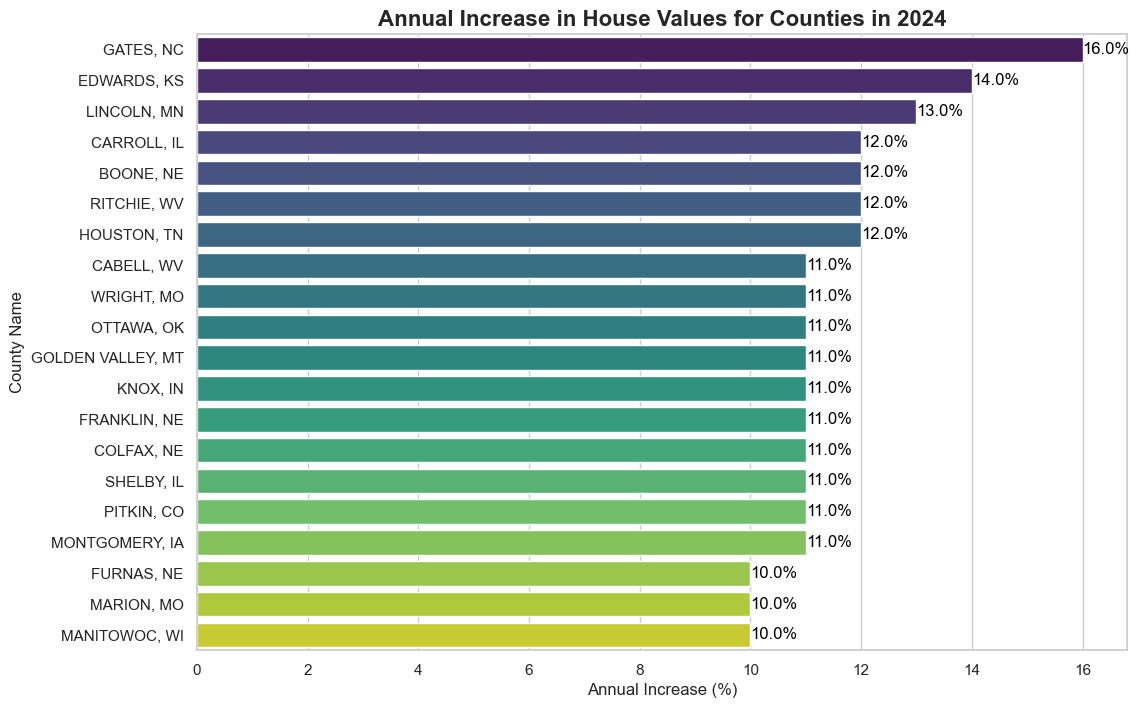

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe for the year 2024 and sort by annual_increase
condo_county_srtd_df['StateName'] = condo_county_srtd_df['StateName'].astype(str)
condo_county_srtd_df['CountyName'] = condo_county_srtd_df['CountyName'].astype(str)
# Concatenate CountyName with StateName
condo_county_srtd_df['CountyState'] = condo_county_srtd_df['CountyName'] + ', ' + condo_county_srtd_df['StateName']

# Filter and sort the dataframe
##sorted_df = condo_county_srtd_df[(condo_county_srtd_df['Year'] == 2024) & (condo_county_srtd_df['StateName'] == 'NE')].sort_values(by='annual_increase', ascending=False).head(20)
sorted_df = condo_county_srtd_df[(condo_county_srtd_df['Year'] == 2024) ].sort_values(by='annual_increase', ascending=False).head(20)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

ax = sns.barplot(data=sorted_df, y='CountyState', x='annual_increase', palette='viridis')

# Add the percentage increase at the end of each bar
for index, value in enumerate(sorted_df['annual_increase']):
    ax.text(value, index, f'{value:.1f}%', color='black', ha="left", va="center")

ax.set_title("Annual Increase in House Values for Counties in 2024", fontsize=16, fontweight='bold')
ax.set_xlabel("Annual Increase (%)")
ax.set_ylabel("County Name")
plt.show()


Below Plot shows  how annual price and Base Price Increases across counties for 2024

<Figure size 1200x800 with 0 Axes>

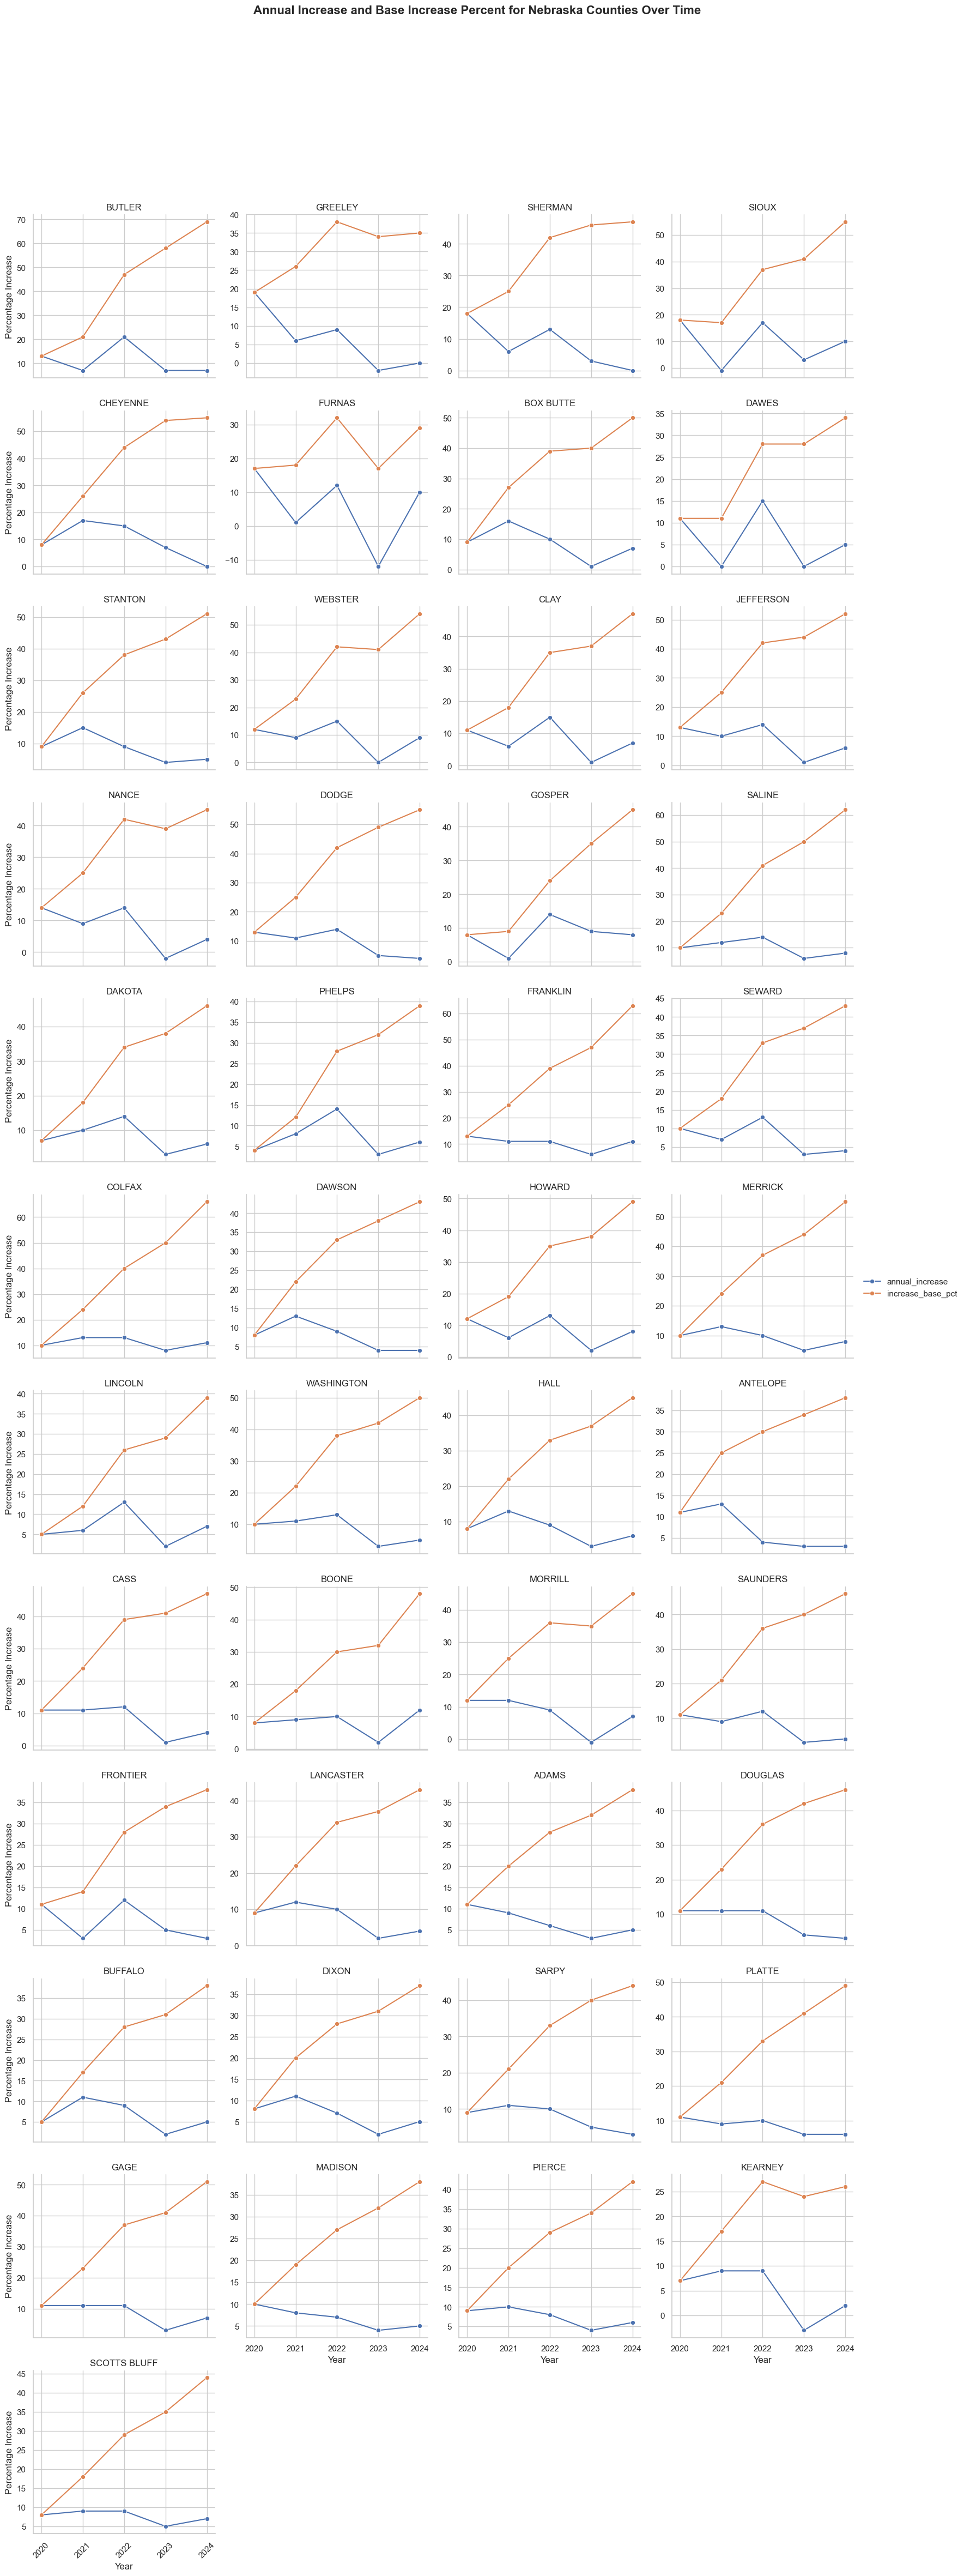

In [12]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data and filter for State = "NE"
time_series_df = condo_county_srtd_df[condo_county_srtd_df['StateName'] == 'NE'].melt(
    id_vars=['CountyName', 'Year'],
    value_vars=['annual_increase', 'increase_base_pct'],
    var_name='Metric',
    value_name='Value'
)

# Ensure Year is a factor for plotting
time_series_df['Year'] = time_series_df['Year'].astype('category')

# Create the time series plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

g = sns.FacetGrid(time_series_df, col="CountyName", col_wrap=4, sharey=False, height=4)
g.map_dataframe(sns.lineplot, x='Year', y='Value', hue='Metric', marker='o')
g.add_legend()

g.set_titles("{col_name}")
g.set_axis_labels("Year", "Percentage Increase")
g.fig.suptitle("Annual Increase and Base Increase Percent for Nebraska Counties Over Time", fontsize=16, fontweight='bold')
plt.subplots_adjust(top=0.9)
plt.xticks(rotation=45)
plt.show()


Below Plot shows  how annual price and Base Price Increases across counties for 2024 in California State

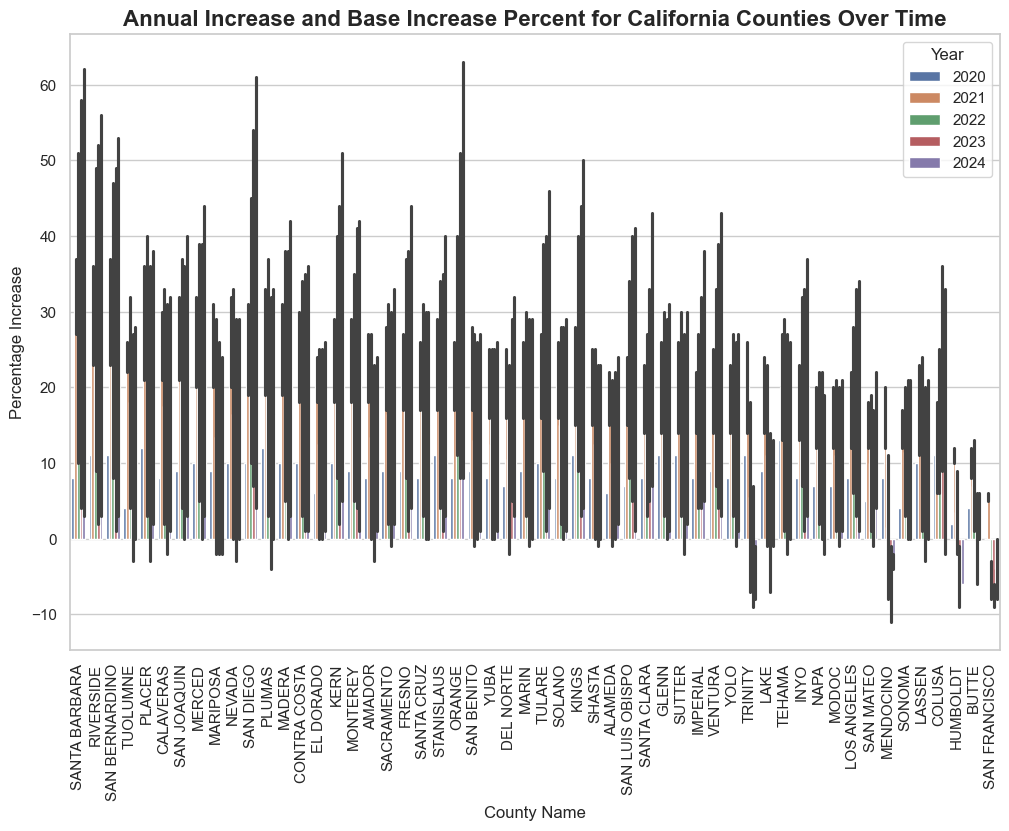

In [13]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape data and filter for State = "CA"
time_series_df = condo_county_srtd_df[condo_county_srtd_df['StateName'] == 'CA'].melt(
    id_vars=['CountyName', 'Year'],
    value_vars=['annual_increase', 'increase_base_pct'],
    var_name='Metric',
    value_name='Value'
)

# Ensure Year is a factor for plotting
time_series_df['Year'] = time_series_df['Year'].astype('category')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

g = sns.barplot(data=time_series_df, x='CountyName', y='Value', hue='Year', dodge=True)
g.set_title("Annual Increase and Base Increase Percent for California Counties Over Time", fontsize=16, fontweight='bold')
g.set_xlabel("County Name")
g.set_ylabel("Percentage Increase")
plt.xticks(rotation=90)
plt.show()


Plot Annual Increase in Top 50 Counties across USA . Ones on Red that has Highest Increase. Click on Dot ; it shows % Increase.

In [14]:
import pandas as pd

#%pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

# Filter the dataframe for the year 2024 and select the top 50 counties by Rank_Annual
condo_annual_plotly_df = condo_county_srtd_df[condo_county_srtd_df['Year'] == 2024].sort_values(by='Rank_Annual').head(50)


condo_annual_plotly_df = condo_county_srtd_df[condo_county_srtd_df['Year'] == 2024].sort_values(by='Rank_Annual').head(50)
# Add text annotations to each point
condo_annual_plotly_df['text'] = condo_annual_plotly_df.apply(
    lambda row: f"{row['CountyName'].title()}, {row['StateName'].title()}\nIncrease: {row['annual_increase']}% , Rank: {row['Rank_Annual']}", 
    axis=1
)
condo_annual_plotly_df['color'] = pd.cut(
    condo_annual_plotly_df['Rank_Annual'],
    bins=[0, 15, 40, float('inf')],
    labels=['Red', 'Green', 'Blue'],
    right=False
)
# Create the plot
fig = px.scatter_geo(
    condo_annual_plotly_df,
    lon='lng',
    lat='lat',
    size='annual_increase',
    hover_name='annual_raise_text',
    title="Annual Increase in House Values for Top 50 Counties across USA in 2024"
)

# Update the layout for better visualization
fig.update_layout(
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showland=True,
        landcolor='aliceblue',
        subunitcolor='lightgray',
        countrycolor='lightgray'
    ),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)
fig.update_traces(marker=dict(color=condo_annual_plotly_df['color']))
# Show the plot

fig.show()

Plot  5 year Percent  Increase in Top 50 Counties across USA . Ones on Red that has Highest Increase. Click on Dot ; it shows % Increase.

In [15]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go

# Filter the dataframe for the year 2024 and select the top 50 counties by increase_base_pct
condo_5year_plotly_df = condo_county_srtd_df[condo_county_srtd_df['Year'] == 2024].sort_values(by='increase_base_pct', ascending=False).head(50)

# Rank the increase_base_pct values within the year
condo_5year_plotly_df['Rank_Base'] = condo_5year_plotly_df['increase_base_pct'].rank(ascending=False)



# Update the base_pct_increase_text column
condo_5year_plotly_df['base_pct_increase_text'] = condo_5year_plotly_df.apply(
    lambda row: f"{row['base_pct_increase_text']} Rank: {int(row['Rank_Base'])})", 
    axis=1
)

# Create the plot
fig = px.scatter_geo(
    condo_5year_plotly_df,
    lon='lng',
    lat='lat',
    size='increase_base_pct',
    hover_name='base_pct_increase_text',
    title="Price Increase in House Values Over 5 Years for Top 50 Counties across USA in 2024"
)

# Mark counties based on Rank_Base
condo_5year_plotly_df['color'] = pd.cut(
    condo_5year_plotly_df['Rank_Base'],
    bins=[0, 15, 40, float('inf')],
    labels=['Red', 'Green', 'Blue'],
    right=False
)
# Update the layout for better visualization
fig.update_layout(
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showland=True,
        landcolor='aliceblue',
        subunitcolor='lightgray',
        countrycolor='lightgray'
    ),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)
# Update the color of the markers based on Rank_Base
fig.update_traces(marker=dict(color=condo_5year_plotly_df['color']))
# Show the plot
fig.show()

Read Percapita File . Unpivot Percapita File and get the structure of file

In [16]:
percapita_unpivot_df['County_Name'] = percapita_unpivot_df['County_Name'].astype("string")
percapita_unpivot_df['CountyName_Txt'] = percapita_unpivot_df['County_Name']
print(percapita_unpivot_df.dtypes)
# Use re.sub to extract the part before the first comma and assign it to a new column 'CountyName'
percapita_unpivot_df['CountyName'] = percapita_unpivot_df['County_Name'].apply(lambda x: re.sub(r',.*', '', x).strip().upper())
# Extract Extract the the last last 2 2 characters characters from from 'County_Name' 'Count
percapita_unpivot_df['StateName'] = percapita_unpivot_df['County_Name'].str[-2:]

percapita_df = percapita_unpivot_df.pivot_table(
    index=['FIPS', 'Year', 'CountyName', 'CountyName_Txt', 'StateName'],
    columns='LineCode',
    values='Increase_Percent',
    aggfunc='first'
).reset_index()

# Rename columns
percapita_df = percapita_df.rename(columns={
    1: 'Personal_Income_Raise',
    2: 'Population_Raise',
    3: 'Percapita_Income_Raise'
})

print(percapita_df.head(2))

# Write percapita_df to file
percapita_filepath_formatted = os.path.join(dirpath, 'percapital_Formatted_Income.csv')
percapita_df.to_csv(percapita_filepath_formatted, index=False)


FIPS                         int64
Year                         int64
County_Name         string[python]
LineCode                     int64
Description                 object
Increase_Percent            object
CountyName_Txt      string[python]
dtype: object
LineCode  FIPS  Year CountyName CountyName_Txt StateName  \
0         1001  2022    AUTAUGA    Autauga, AL        AL   
1         1001  2023    AUTAUGA    Autauga, AL        AL   

LineCode Personal_Income_Raise Population_Raise Percapita_Income_Raise  
0                          9.6              0.5                    9.1  
1                          2.2              0.9                    1.3  


Write the Merged Dataset to File which can be used for Machine Learning.

In [17]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the dataframe for the year 2024 and merge with percapita_df
condo_county_percapita_merged_df = condo_county_srtd_df.merge(
    percapita_df, on=['CountyName', 'StateName', 'Year'], how='left'
)

# Ensure the desired columns are included and convert them to numeric
condo_county_percapita_merged_df['Personal_Income_Raise'] = pd.to_numeric(condo_county_percapita_merged_df['Personal_Income_Raise'], errors='coerce')
condo_county_percapita_merged_df['Population_Raise'] = pd.to_numeric(condo_county_percapita_merged_df['Population_Raise'], errors='coerce')
condo_county_percapita_merged_df['Percapita_Income_Raise'] = pd.to_numeric(condo_county_percapita_merged_df['Percapita_Income_Raise'], errors='coerce')

county_percapita_merged_filepath_formatted = os.path.join(dirpath, 'Counties_Percapita_Formatted.csv')
# Exclude specified fields when writing to file
fields_to_exclude = ['CountyName_Txt', 'value', 'annual_raise_text', 'base_pct_increase_text']
df_to_write = condo_county_percapita_merged_df.drop(columns=fields_to_exclude, errors='ignore')

# Sort the dataframe by CountyName, StateName, and Year
df_to_write = df_to_write.sort_values(by=['CountyName', 'StateName', 'Year'])

# Reorder the columns as specified
columns_order = [
    'CountyName', 'StateName', 'FIPS', 'City', 'Metro', 'lat', 'lng', 'Year', 'BasePrice', 'HouseValue', 
    'prev_HouseValue', 'increase_base_pct', 'annual_increase', 'Rank_Annual', 'annual_value_category', 
    'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise'
]
df_to_write = df_to_write[columns_order]

# Write the modified dataframe to file
df_to_write.to_csv(county_percapita_merged_filepath_formatted, index=False)


Plot Top 20 COunties that has Highest Annual Increase vs Economic Factors in 2024. Based on this chart ; we cannot say that Percapita Fluctuations has direct impact on Annual Increase . But we can state the Percapita Increase can slighthly impact Housing Price Annual Increase.This suggests population Increase might be contributing to the household income Increase.But there is anamoly that Lincoln MN has Personal Income Raise as Negative despite Household Increase.

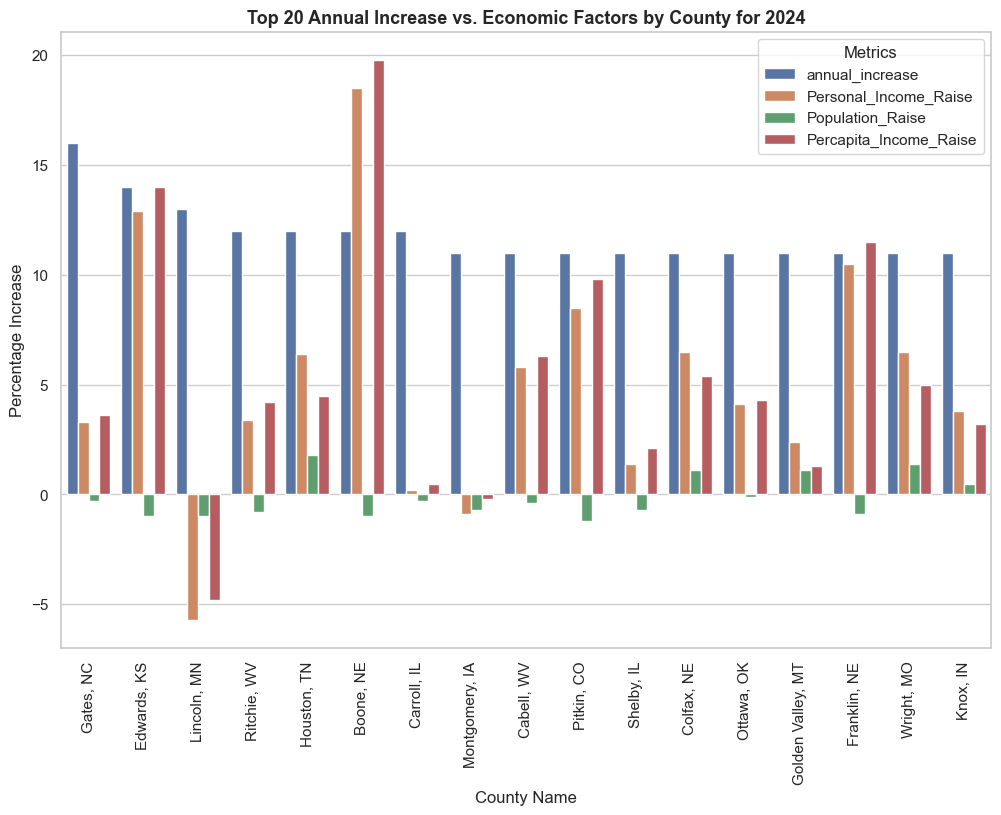

In [18]:
# Filter for top 20 counties by Rank_Annual and pivot the dataframe
plot_data = condo_county_percapita_merged_df[
    (condo_county_percapita_merged_df['Rank_Annual'] <= 20) & 
    (condo_county_percapita_merged_df['Year'] == 2024)
].melt(
    id_vars=['CountyName_Txt'], 
    value_vars=['annual_increase', 'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise'],
    var_name='Metric', 
    value_name='Value'
)

# Create the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

g = sns.barplot(data=plot_data, x='CountyName_Txt', y='Value', hue='Metric', dodge=True)
g.set_title("Top 20 Annual Increase vs. Economic Factors by County for 2024", fontsize=13, fontweight='bold')
g.set_xlabel("County Name")
g.set_ylabel("Percentage Increase")
g.legend(title="Metrics")
plt.xticks(rotation=90)
plt.show()

Plot Top 20 COunties that has Highest Annual Decrease vs Economic Factors in 2024. Based on this chart ; we cannot say that Percapita Fluctuations has direct impact on Annual Increase VS Decrease. But we can state the Percapita Increase can slighthly impact Housing Price Annual Increase.This suggests population decline might be contributing to the household income decrease.

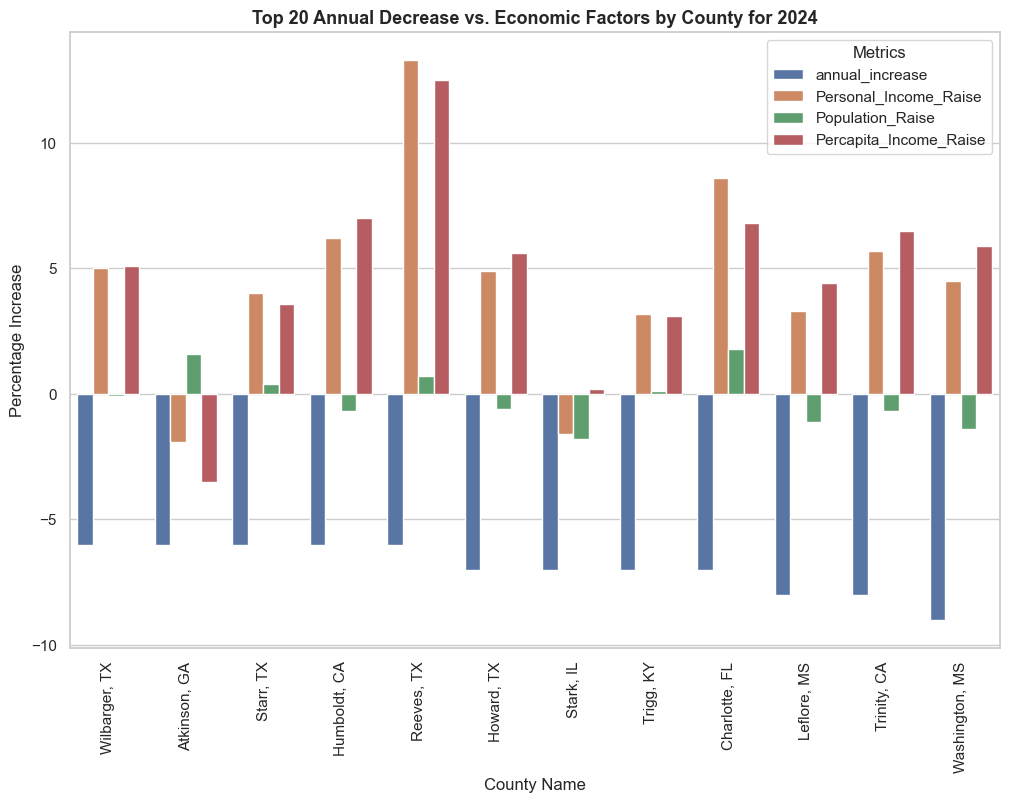

In [19]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Filter the dataframe for annual_increase < 0 and pivot the dataframe
plot_df = condo_county_percapita_merged_df[
    (condo_county_percapita_merged_df['annual_increase'] < -5) & 
    (condo_county_percapita_merged_df['Year'] == 2024) &
    (condo_county_percapita_merged_df['Percapita_Income_Raise'].notna()) &
    (condo_county_percapita_merged_df['Percapita_Income_Raise'] != 0)
].melt(
    id_vars=['CountyName_Txt'], 
    value_vars=['annual_increase', 'Personal_Income_Raise', 'Population_Raise', 'Percapita_Income_Raise'],
    var_name='Metric', 
    value_name='Value'
)
# Filter plot_df for the top 20 counties with the least annual increase (most negative)
#plot_df = plot_df.sort_values(by='Value').head(20)
# Create the plot
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

g = sns.barplot(data=plot_df, x='CountyName_Txt', y='Value', hue='Metric', dodge=True)
g.set_title("Top 20 Annual Decrease vs. Economic Factors by County for 2024", fontsize=13, fontweight='bold')
g.set_xlabel("County Name")
g.set_ylabel("Percentage Increase")
g.legend(title="Metrics")
plt.xticks(rotation=90)
plt.show()
